## 4 Qubit 

## Optimized circuit

In [133]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import Parameter

thetas = [Parameter(f"theta_{i}") for i in range(2*14)]
phis = [Parameter(f"phi_{i}") for i in range(2*4)]

In [134]:
qc = QuantumCircuit(4)

In [135]:
qc.rx(phis[0], 0)
qc.rx(phis[1], 1)
qc.rx(phis[2], 2)
qc.rx(phis[3], 3)

qc.rz(thetas[0], 0)
qc.rz(thetas[1], 1)
qc.rz(thetas[2], 2)
qc.rz(thetas[3], 3)
#Params 0-3
qc.cx(2,0)
qc.cx(3,1)
qc.cx(2,0)
qc.cx(0,3)
qc.barrier()

qc.rz(thetas[4], 0 )
qc.rz(thetas[5], 1 )
qc.rz(thetas[6], 2 )
qc.rz(thetas[7], 3 )
# Params 0-3

qc.cx(0, 1)
qc.cx(0, 2)
qc.cx(1, 3)
qc.cx(1, 0)
qc.cx(2, 0)
qc.cx(0, 3)
qc.cx(1, 3)
qc.cx(2, 3)
qc.barrier()

qc.rz(thetas[8], 0 )
qc.rz(thetas[9], 1 )
qc.rz(thetas[10], 2 )
qc.rz(thetas[11], 3 )
# Params 0-3
qc.cx(2, 3)
qc.cx(1, 2)
qc.cx(2, 0)
qc.cx(3, 0)
qc.barrier()

# Params 0, 2-3
qc.rz(thetas[12], 2 )
qc.rz(thetas[13], 3 )
qc.cx(1, 0)
qc.cx(2, 0)
qc.cx(3, 1)
qc.cx(0, 2)
qc.cx(2, 3)
qc.cx(0, 3)


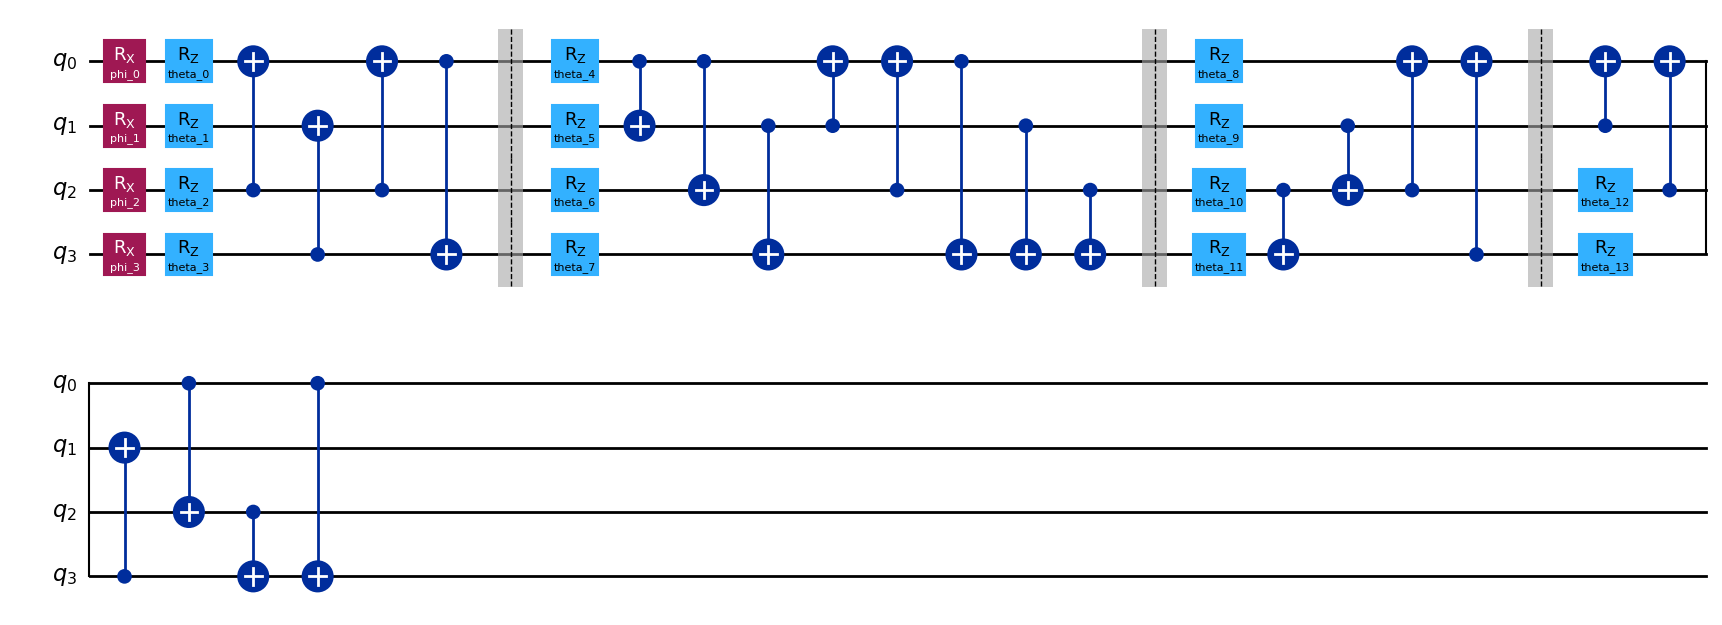

In [136]:
qc.draw("mpl")

In [137]:

#---------------------
qc.rx(phis[4], 0)
qc.rx(phis[5], 1)
qc.rx(phis[6], 2)
qc.rx(phis[7], 3)

qc.rz(thetas[14], 0)
qc.rz(thetas[15], 1)
qc.rz(thetas[16], 2)
qc.rz(thetas[17], 3)
#Params 0-3
qc.cx(2,0)
qc.cx(3,1)
qc.cx(2,0)
qc.cx(0,3)
qc.barrier()

qc.rz(thetas[18], 0 )
qc.rz(thetas[19], 1 )
qc.rz(thetas[20], 2 )
qc.rz(thetas[21], 3 )
# Params 0-3

qc.cx(0, 1)
qc.cx(0, 2)
qc.cx(1, 3)
qc.cx(1, 0)
qc.cx(2, 0)
qc.cx(0, 3)
qc.cx(1, 3)
qc.cx(2, 3)
qc.barrier()

qc.rz(thetas[22], 0 )
qc.rz(thetas[23], 1 )
qc.rz(thetas[24], 2 )
qc.rz(thetas[25], 3 )
# Params 0-3
qc.cx(2, 3)
qc.cx(1, 2)
qc.cx(2, 0)
qc.cx(3, 0)
qc.barrier()

# Params 0, 2-3
qc.rz(thetas[26], 2 )
qc.rz(thetas[27], 3 )
qc.cx(1, 0)
qc.cx(2, 0)
qc.cx(3, 1)
qc.cx(0, 2)
qc.cx(2, 3)
qc.cx(0, 3)


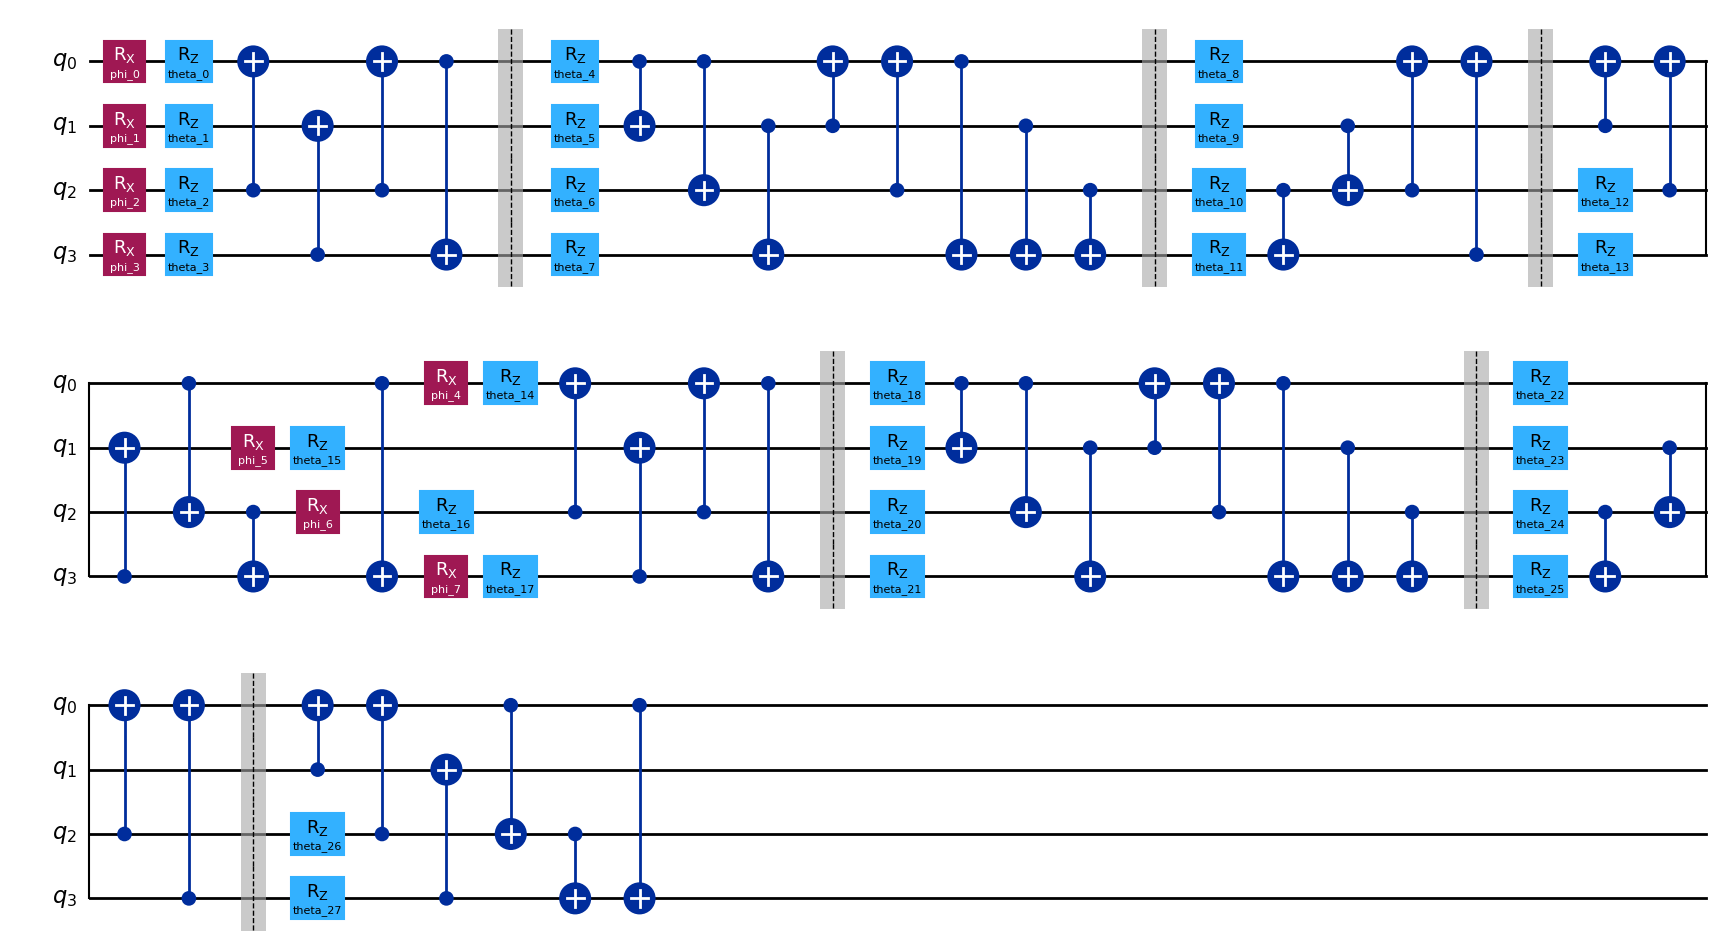

In [138]:
qc.draw("mpl")

In [139]:
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import EstimatorV2 as Estimator
# SciPy minimizer routine
from scipy.optimize import minimize
import numpy as np

estimator = Estimator()
x0 = np.pi/2 * np.random.random((14+4)*2)
params = x0
H = np.diag(10*(np.random.rand(16)-0.5))
ops = SparsePauliOp.from_operator(H)
pub = (qc.decompose(), [ops], [params])

In [140]:
ops

SparsePauliOp(['IIII', 'IIIZ', 'IIZI', 'IIZZ', 'IZII', 'IZIZ', 'IZZI', 'IZZZ', 'ZIII', 'ZIIZ', 'ZIZI', 'ZIZZ', 'ZZII', 'ZZIZ', 'ZZZI', 'ZZZZ'],
              coeffs=[-1.49286904+0.j, -1.49779872+0.j,  0.24056894+0.j,  0.03339743+0.j,
 -0.14931698+0.j, -0.91355678+0.j,  0.27166753+0.j, -0.17319571+0.j,
 -0.72319441+0.j,  0.17673184+0.j,  1.05224077+0.j, -0.82408607+0.j,
  0.6043366 +0.j, -0.31769654+0.j,  0.11303397+0.j, -0.07967356+0.j])

In [141]:
cost_history_dict = {
    "prev_vector": np.pi/8 * np.random.random((14+4)*2),
    "iters": 0,
    "cost_history": [],
}

def cost_func(params, ansatz, hamiltonian, estimator):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (EstimatorV2): Estimator primitive instance
        cost_history_dict: Dictionary for storing intermediate results

    Returns:
        float: Energy estimate
    """

    pub = (ansatz, [hamiltonian], [params])
    result = estimator.run(pubs=[pub]).result()
    energy = result[0].data.evs[0]

    cost_history_dict["iters"] += 1
    cost_history_dict["prev_vector"] = params
    cost_history_dict["cost_history"].append(energy)
    print(f"Iters. done: {cost_history_dict['iters']} [Current cost: {energy:.10}]")

    return energy

In [142]:
H.min()

-4.947317316856394

In [143]:
estimator = Estimator()
res = minimize(
    cost_func,
    cost_history_dict["prev_vector"],
    args = (qc.decompose(), ops, estimator),
    method="cobyla",
    options={"maxiter":4000}
)

Iters. done: 1 [Current cost: -3.277242231]
Iters. done: 2 [Current cost: -0.9208948295]
Iters. done: 3 [Current cost: -3.672500817]
Iters. done: 4 [Current cost: -3.489236403]
Iters. done: 5 [Current cost: -2.787956895]
Iters. done: 6 [Current cost: -3.879489768]
Iters. done: 7 [Current cost: -1.811385288]
Iters. done: 8 [Current cost: -3.60730445]
Iters. done: 9 [Current cost: -3.098536794]
Iters. done: 10 [Current cost: -4.029033662]
Iters. done: 11 [Current cost: -3.550945247]
Iters. done: 12 [Current cost: -4.090518476]
Iters. done: 13 [Current cost: -3.449457111]
Iters. done: 14 [Current cost: -3.671660938]
Iters. done: 15 [Current cost: -3.67160409]
Iters. done: 16 [Current cost: -4.090518476]
Iters. done: 17 [Current cost: -4.090518476]
Iters. done: 18 [Current cost: -4.090518476]
Iters. done: 19 [Current cost: -4.090518476]
Iters. done: 20 [Current cost: -4.090518476]
Iters. done: 21 [Current cost: -4.090518476]
Iters. done: 22 [Current cost: -4.090958277]
Iters. done: 23 [Cur

In [144]:
from matplotlib import pyplot as plt

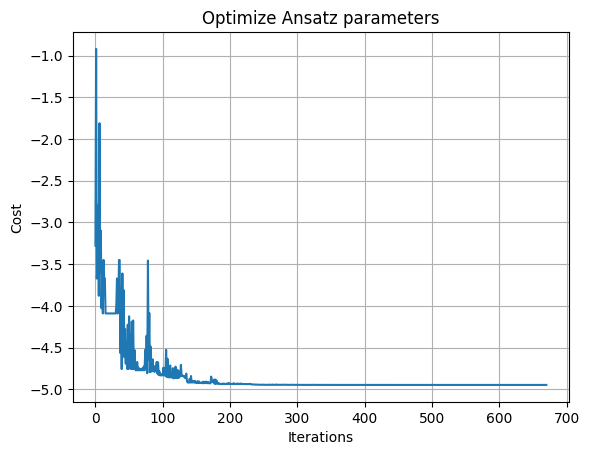

In [145]:
fig, ax = plt.subplots()
ax.plot(range(cost_history_dict["iters"]), cost_history_dict["cost_history"])
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
ax.grid()
ax.set_title("Optimize Ansatz parameters")
plt.draw()



In [120]:
from qiskit.circuit.library import QAOAAnsatz

circuit = QAOAAnsatz(cost_operator=ops, reps=2)
circuit.measure_all()

In [121]:
circuit.draw()

┌────────────────────────────┐ ░ ┌─┐         
   q_0: ┤0                           ├─░─┤M├─────────
        │                            │ ░ └╥┘┌─┐      
   q_1: ┤1                           ├─░──╫─┤M├──────
        │  QAOA(γ[0],β[0],γ[1],β[1]) │ ░  ║ └╥┘┌─┐   
   q_2: ┤2                           ├─░──╫──╫─┤M├───
        │                            │ ░  ║  ║ └╥┘┌─┐
   q_3: ┤3                           ├─░──╫──╫──╫─┤M├
        └────────────────────────────┘ ░  ║  ║  ║ └╥┘
meas: 4/══════════════════════════════════╩══╩══╩══╩═
                                          0  1  2  3

# Arbitrary IZ hamiltonian

from 

In [5]:
from itertools import combinations

In [10]:
len(list(combinations("1234", 3)))

4

In [11]:
6*2 + 4*3 + 6*1

30